# Classifying Amazon Reviews

## Background

This is a project completed for my MIS class in my first term of my M.S. in Business Analytics program. Our goal was to analyze reviews from Amazon.com that were written about various music streaming service applications. 

## Business Problem

While analytics with quantative data has been around for some time, text analytics has been largely under-utilized. By tapping into the huge amount of product/service review data that is generated by customers, we can determine the best course of action to improve these products and services and grow the customer base. 

## Recommendations

- Pandora: Needs to improve on innovative features because people are leaving them for more modern and feature rich services.
- Spotify: Needs to work with advertisement providers to reduce inappropriate ads being played to customers.
- All of the services need to work better with their developers to increase stability in their applications. 

## Data Cleaning

The reviews have been previously scraped from Amazon.com and exported as a CSV file. The following code is for importing and cleaning the dataset. This includes tokenzing the reviews into individual words, removing stop words, and conducting stemming (keeping only the root of the word to avoid duplication). 

This code also includes some data exploration such as looking at the most frequent words that are listed in the reviews. 

In [25]:
import pandas as pd
import datetime as dt
import nltk
import matplotlib.pyplot as mpl
from gensim import corpora, models
import gensim
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import os




#importing the csv files for each
amazon_music = pd.read_csv('Amazon_new.csv')
spotify_merged = pd.read_csv('Spotify_clean.csv')
pandora = pd.read_csv('Pandora_new.csv')
iradio = pd.read_csv('iHeartRadio_new.csv')

#creating a list of stopwords

stopwords = nltk.corpus.stopwords.words('english')

new_stops = ["amazon", "love", "app", "music", "009f", "f0"] 
stopwords.extend(new_stops)

#########################################################################################################################################################
###########################################################Tokenizing and Cleaning - Amazon Music########################################################
#########################################################################################################################################################

tokenizer = RegexpTokenizer(r'\w+')

lemmatize = WordNetLemmatizer()

amazon_music['comments_str'] = [str(comment) for comment in amazon_music['comments']]


am_tokens = []

for i in amazon_music['comments_str']:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stopwords]
    lemmatized_tokens = [lemmatize.lemmatize(i) for i in stopped_tokens]
    am_tokens.append(lemmatized_tokens)

#Turn tokenized reviews into a dictionary
dictionary_am = corpora.Dictionary(am_tokens)


#Bag of words

corpus_am = [dictionary_am.doc2bow(text) for text in am_tokens]

#########################################################################################################################################################
###########################################################Tokenizing and Cleaning - Spotify#############################################################
#########################################################################################################################################################

spotify_merged['comments_str'] = [str(comment) for comment in spotify_merged['comments']]


spotify_tokens = []

for i in spotify_merged['comments_str']:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stopwords]
    lemmatized_tokens = [lemmatize.lemmatize(i) for i in stopped_tokens]
    spotify_tokens.append(lemmatized_tokens)

#Turn tokenized reviews into a dictionary
dictionary_spotify = corpora.Dictionary(spotify_tokens)


#Bag of words

corpus_spotify = [dictionary_spotify.doc2bow(text) for text in spotify_tokens]

#########################################################################################################################################################
###########################################################Tokenizing and Cleaning - Pandora#############################################################
#########################################################################################################################################################

pandora['comments_str'] = [str(comment) for comment in pandora['comments']]

pandora_tokens = []

for i in pandora['comments_str']:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stopwords]
    lemmatized_tokens = [lemmatize.lemmatize(i) for i in stopped_tokens]
    pandora_tokens.append(lemmatized_tokens)

#Turn tokenized reviews into a dictionary
dictionary_pandora = corpora.Dictionary(pandora_tokens)


#Bag of words

corpus_pandora = [dictionary_pandora.doc2bow(text) for text in pandora_tokens]

#########################################################################################################################################################
###########################################################Tokenizing and Cleaning - iHeartRadio########################################################
#########################################################################################################################################################

iradio['comments_str'] = [str(comment) for comment in iradio['comments']]

iradio_tokens = []

for i in iradio['comments_str']:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stopwords]
    lemmatized_tokens = [lemmatize.lemmatize(i) for i in stopped_tokens]
    iradio_tokens.append(lemmatized_tokens)

#Turn tokenized reviews into a dictionary
dictionary_iradio = corpora.Dictionary(iradio_tokens)


#Bag of words

corpus_iradio = [dictionary_iradio.doc2bow(text) for text in iradio_tokens]


## Topic Modeling

The following code utilizes LDA (Latent Dirichlet allocation) to perform exploratory topic analysis for each music service.

### Amazon Music

In [26]:
#LDA model

import warnings
warnings.filterwarnings('ignore')

ldamodel_am = gensim.models.ldamodel.LdaModel(corpus_am, num_topics=10, id2word = dictionary_am, passes=5)

import pyLDAvis.gensim

vis_am = pyLDAvis.gensim.prepare(ldamodel_am, corpus_am, dictionary_am)

pyLDAvis.display(vis_am)


### Spotify

In [27]:
ldamodel_spotify = gensim.models.ldamodel.LdaModel(corpus_spotify, num_topics=10, id2word = dictionary_spotify, passes=5)

vis_spotify = pyLDAvis.gensim.prepare(ldamodel_spotify, corpus_spotify, dictionary_spotify)

pyLDAvis.display(vis_spotify)

### Pandora

In [28]:
ldamodel_pandora = gensim.models.ldamodel.LdaModel(corpus_pandora, num_topics=10, id2word = dictionary_pandora, passes=5)

vis_pandora = pyLDAvis.gensim.prepare(ldamodel_pandora, corpus_pandora, dictionary_pandora)

pyLDAvis.display(vis_pandora)

### iHeartRadio

In [29]:
ldamodel_iradio = gensim.models.ldamodel.LdaModel(corpus_iradio, num_topics=10, id2word = dictionary_iradio, passes=5)

vis_iradio = pyLDAvis.gensim.prepare(ldamodel_iradio, corpus_iradio, dictionary_iradio)

pyLDAvis.display(vis_iradio)

## Attribute Analysis and Logistic Regression

After conducting the above topic modeling, a few common themes were discovered. In general, people wrote reviews about the following attributes of each music service: ease of use, compatibility with other apps, advertisements, compatibility with devices, and how the service compares to the competition.

It would be great if we could compare the different music service apps on how positive or negative the reviews are for different attributes. For example, it would be useful to know if reviews about the music service's ease of use are mostly positive across the different services, or if some services are having issues. This could also give us a general idea of which music services are performing better than others within certain attributes. 

The reviews that were acquired from Amazon.com also include the star ratings (1-5) that customers indicate when writing the reviews. While this could generally be used to determine how positive or negative a review is, sometimes customers give lower star ratings for things not relating to the product/service and could skew the ratings. One instance is when people reduce the ratings for how products are shipped. While this does not apply here since these are virtual services, there could potentially be other reasons for skewed ratings. 

Commonly, sentiment analysis is conducted by creating a dictionary that maps certain words to a positive or negative valence. Instead of using that technique, in this case the model is trained using the 5 star (most positive) and 1 star (most negative) reviews. This should teach the model the types of words associated with very high and very low reviews, and provide a decent classification and prediction (for future data) of whether a review is positive or negative. 

The following code was run 20 times (music service x attribute) to obtain positive/negative values (based on the training data) for a sample of reviews that contained each attribute for each music service. Obtaining the reviews that were written about specific attributes was done manually. 

In [31]:
#Note: A different tokenzing method was used for the logistic regression, in order to more easily shape the data for the analysis.



train_data_df = pd.read_csv('data_full_train_even.csv')
test_data_df = pd.read_csv('AmazonMusic_MusicSelection.csv')
train_data_df = pd.DataFrame.dropna(train_data_df)

import re, nltk
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem.porter import PorterStemmer

#######
# based on http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # remove non letters
    text = re.sub("[^a-zA-Z]", " ", text)
    # tokenize
    tokens = nltk.word_tokenize(text)
    # stem
    stems = stem_tokens(tokens, stemmer)
    return stems
######## 

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    stop_words = 'english',
    max_features = 85
)

corpus_data_features = vectorizer.fit_transform(train_data_df.Text.tolist() + test_data_df.Text.tolist())
corpus_data_features_nd = corpus_data_features.toarray()


from sklearn.cross_validation import train_test_split

# remember that corpus_data_features_nd contains all of our original train and test data, so we need to exclude
# the unlabeled test entries
X_train, X_test, y_train, y_test  = train_test_split(
    corpus_data_features_nd[0:len(train_data_df)], 
    train_data_df.Sentiment,
    train_size=0.85, 
    random_state=1234)

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model = log_model.fit(X=X_train, y=y_train)

y_pred = log_model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# train classifier
log_model = LogisticRegression()
log_model = log_model.fit(X=corpus_data_features_nd[0:len(train_data_df)], y=train_data_df.Sentiment)

# get predictions
test_pred = log_model.predict(corpus_data_features_nd[len(train_data_df):])


# sample some of them
import random
spl = random.sample(range(len(test_pred)), 15)

# print text and labels
for text, sentiment in zip(test_data_df.Text[spl], test_pred[spl]):
    print(sentiment, text)
    

             precision    recall  f1-score   support

          0       0.80      0.83      0.82       299
          1       0.82      0.80      0.81       301

avg / total       0.81      0.81      0.81       600

1 Loving my Amazon Music! It's my favorite music app and I use it all the time, both for my own collection and to streaming. Super selection of available music. I really like that I can download so many of my favorites for free. Pretty awesome! I feel like I get my moneys worth with my Prime membership with so many benefits available. One of my smarter investments.
1 Way better than I thought. After years of using Pandora, uuugh, the ads.  Love the Prime stations for genres. Skip all you like, repeat, great selection for any setting.
1 Great selection of music. Love Amazon Music! Great streaming quality no interruptions.
1 this has a great selection of good tunes with prime members but it is confusing navigating through  site they could if amazon wanted to streamline this ap

## Results

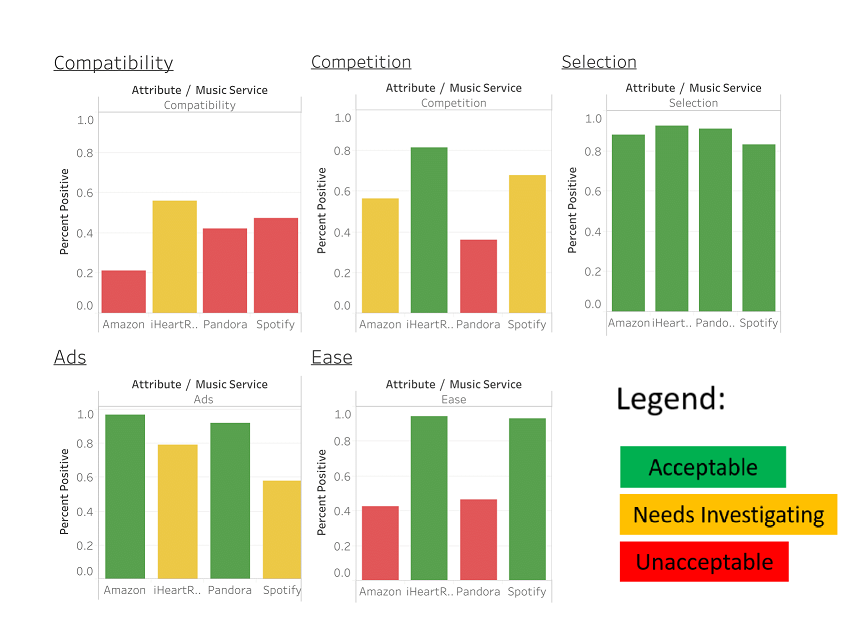

In [54]:
from IPython.display import Image
from IPython.core.display import HTML 
filename = "C:/docs/"
Image(filename = filename + "Dashboard-3.png")


The above dashboard shows the breakdown of the % of positive reviews for each music service by the attribute. The dashboard shows us a few things. First, we can see which attributes are performing either poorly or well across all the music services. Music selection is the only attribute that is positively reviewed across all the services, while compatibility with devices seems to be a weak point for all services. 

Additionally, we can compare the services and what certain services should improve on. In terms of competing services, reviews of Pandora seem to talk about other competition apps in a positive way. Amazon Music and Pandora suffer in ease of use compared to iHeartRadio and Spotify, while Spotify seems to have an issue with playing inappropriate ads for its users. 

## Limitations and Future Directions

 1. Reviews containing multiple attributes.
     - One of the issues that we face is that often customers include multiple attributes within a single review, and so that becomes difficult to classify.   
 2. Manual assignment of attribute reviews - small sample of reviews.
     - Ideally, it would be best to develop code which can automatically identify which attributes the customers are writing about. Although given the previous limitation, this is an entirely new project on its own.
 3. Doing statistical analysis when we get a larger sample to see if there are significant differences between how attributes are performing across services. 
     - In the above dashboard, we looked at how services compare to each other visually, however it would be useful to actually see if services perform better than other services using statistical tests. 
 4. Training on most positive and negative reviews could still have its own problems.
     - By straying from the standard approach of using a dictionary for sentiment analysis, some important words could be ommitted and more error might be introduced. The benefit of training on existing reviews is limiting the typical problem of not using an appropriate lexicon for the population.
 5. Reviews were obtained from Amazon while most of the apps are downloaded from other sources.
     - Most people download these apps from either the Google Play Store or Apple's App Store. There could be a generalization issue in that the reviews found on Amazon.com have different content from those on other platforms.